In [108]:
from __future__ import print_function  # Python 2 and 3
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
%matplotlib inline
pd.pandas.set_option('display.max_columns',None)

In [109]:
data = pd.read_csv('test.csv', index_col=0)
df = data.copy()

In [110]:
df[df['Exterior1st'] == 'ImStucc']

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [111]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml


## Missing Values

In [112]:
features_with_na = list(df.columns[pd.isna(df).sum()>0])
features_with_na

['MSZoning',
 'LotFrontage',
 'Alley',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType']

In [113]:
#missing values for categorical features

categorical_features_na = [feature for feature in df.columns if (data[feature].dtypes == 'O') and (feature in features_with_na)]
categorical_features_na

['MSZoning',
 'Alley',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType']

In [114]:
#replacing missing categorical variable values with new 'Missing' label

def replace_na(dataset, features_w_na):
    data = dataset.copy()
    data[features_w_na] = data[features_w_na].fillna('Missing')
    return data

df = replace_na(df,categorical_features_na)

#df[categorical_features_na].isna().sum()

In [115]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,Missing,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,Missing,MnPrv,Missing,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,Missing,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,Missing,Missing,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,Missing,MnPrv,Missing,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,Missing,Missing,Missing,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,Missing,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,Missing,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,Missing,Missing,Missing,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,Missing,Missing,NaN,Missing,0.0,0.0,Missing,Missing,Y,0,0,0,0,0,0,Missing,Missing,Missing,0,6,2006,WD,Normal
2916,160,RM,21.0,1894,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,Missing,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,Missing,Missing,Missing,0,4,2006,WD,Abnorml
2917,20,RL,160.0,20000,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1

I am imputing each column based on the actual meaning of NA for that feature. For all remaining NAs, I will drop the row

In [116]:

#df['Alley'] = df['Alley'].replace('Missing', 'No alley access')

In [117]:
#imputing NAs in basement categorical features as 'No basement'
#basement_cat_features_na = [feature for feature in categorical_features_na if 'Bsmt' in feature]

#for feature in basement_cat_features_na:
    #df[feature] = df[feature].replace('Missing', 'No basement')

In [118]:
#replacing NAs in Garage categorical features with 'No garage'
#garage_cat_features_na = [feature for feature in categorical_features_na if 'Garage' in feature] 

#for feature in garage_cat_features_na:
    #df[feature] = df[feature].replace('Missing', 'No garage')

In [119]:
#replaceing Fireplace NAs with'No fireplace'

#df['FireplaceQu'] = df['FireplaceQu'].replace('Missing', 'No fireplace')

In [120]:
#df[df['FireplaceQu'] == 'No fireplace']

In [121]:
todrop= ['MasVnrType', 'MasVnrArea', 'Electrical']

data[todrop].isna()

meaningful_nas = [feature for feature in categorical_features_na if feature not in todrop]

for feature in meaningful_nas:
    df[feature]= df[feature].replace('Missing', 'not present')

In [122]:
#for feature in todrop:
    #df = df.drop(df[df[feature] == 'Missing'].index)

In [123]:
list(df.columns[pd.isna(df).sum()>0])

['LotFrontage',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea']

In [124]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,not present,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,not present,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,not present,MnPrv,not present,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,not present,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,not present,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,not present,not present,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,not present,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,not present,MnPrv,not present,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,not present,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,not present,not present,not present,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,not present,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,not present,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,not present,not present,not present,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,not present,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,not present,not present,NaN,not present,0.0,0.0,not present,not present,Y,0,0,0,0,0,0,not present,not present,not present,0,6,2006,WD,Normal
2916,160,RM,21.0,1894,Pave,not present,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,not present,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,not present,not present,not present,0,4,2006,WD,Abnorml
2917,20,RL,160.0,20000,Pave,not present,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,Vinyl

### Missing Numerical Values 

In [125]:
#replacing numerical values
numerical_features_na= [feature for feature in df.columns if (data[feature].dtypes != 'O') and (feature in features_with_na)]
numerical_features_na

['LotFrontage',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea']

In [126]:
#for feature in numerical_features_na:
    #df[feature+'_na']=np.where(df[feature].isna(),1,0)
#df[df['MasVnrArea'].isna()]
#df['LotFrontage'].fillna(df['LotFrontage'].median(),inplace = True)
#df[df['LotFrontage_na'] == 1]


In [127]:
df['LotFrontage'].fillna(df['LotFrontage'].median(),inplace = True)
df['MasVnrArea'].fillna(df['MasVnrArea'].mean(),inplace = True)
df['GarageYrBlt'].fillna(df['GarageYrBlt'].median(),inplace = True)

In [128]:
#df_imputed_nums = df
#df=df.drop(['LotFrontage_na', 'MasVnrArea_na', 'GarageYrBlt_na'], axis=1)

In [129]:
#df[df['LotFrontage_na'] == 1]
#df[df['MasVnrArea_na'] == 1]
#df[df['GarageYrBlt_na'] == 1]

In [130]:
d = list(df.columns[pd.isna(df).sum()>0])

In [131]:
for feature in d:
    df[feature].fillna(df[feature].median(),inplace = True)

In [132]:
sum(df.isna().sum())

0

In [133]:
#drop_rows = list(df[df.isna().sum(axis=1)>0].index)
#drop_rows

In [134]:
#df = df.drop(drop_rows, axis=0)

## Feature Engineering

In [135]:
#dropping the other Basement SF columns and keeping Total Basement SF
df['TotalFinishedBsmt'] = df['BsmtFinSF1'] + df['BsmtFinSF2']
df=df.drop(['BsmtFinSF1','BsmtFinSF2'], axis=1)

In [136]:
#Creating a TotalBaths column and dropping the specific bathroom columns
df['TotalBath']=df['BsmtFullBath'] + df['FullBath'] + (.5* df['BsmtHalfBath']) + (.5* df['HalfBath'])
df=df.drop(['BsmtFullBath','FullBath','BsmtHalfBath', 'HalfBath'], axis=1)

In [137]:
#Creating TotalPorch column and dropping individual porch columns
df['EnclosedPorch']= df['EnclosedPorch'] + df['3SsnPorch'] + df['ScreenPorch']
df=df.drop(['3SsnPorch', 'ScreenPorch'], axis=1)


In [138]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalFinishedBsmt,TotalBath
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,not present,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,LwQ,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,2,1,TA,5,Typ,0,not present,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,120,0,not present,MnPrv,not present,0,6,2010,WD,Normal,612.0,1.0
1462,20,RL,81.0,14267,Pave,not present,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,Unf,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,3,1,Gd,6,Typ,0,not present,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,not present,not present,Gar2,12500,6,2010,WD,Normal,923.0,1.5
1463,60,RL,74.0,13830,Pave,not present,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,Unf,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,not present,MnPrv,not present,0,3,2010,WD,Normal,791.0,2.5
1464,60,RL,78.0,9978,Pave,not present,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,Unf,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,not present,not present,not present,0,6,2010,WD,Normal,602.0,2.5
1465,120,RL,43.0,5005,Pave,not present,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,Unf,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,2,1,Gd,5,Typ,0,not present,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,144,0,not present,not present,not present,0,1,2010,WD,Normal,263.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,not present,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,Unf,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,3,1,TA,5,Typ,0,not present,not present,1979.0,not present,0.0,0.0,not present,not present,Y,0,0,0,0,not present,not present,not present,0,6,2006,WD,Normal,0.0,1.5
2916,160,RM,21.0,1894,Pave,not present,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,Unf,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,3,1,TA,6,Typ,0,not present,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,not present,not present,not present,0,4,2006,WD,Abnorml,252.0,1.5
2917,20,RL,160.0,20000,Pave,not present,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,Unf,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,not present,not present,not present,0,9,2006,W

## Engineering Year Variables

In [139]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
year_features = [feature for feature in numerical_features if 'Year' in feature or 'Yr' in feature]

In [140]:
for feature in year_features[0:3]:
    df[feature] = df['YrSold'] - df[feature]

In [141]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalFinishedBsmt,TotalBath
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,not present,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,49,49,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,LwQ,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,2,1,TA,5,Typ,0,not present,Attchd,49.0,Unf,1.0,730.0,TA,TA,Y,140,0,120,0,not present,MnPrv,not present,0,6,2010,WD,Normal,612.0,1.0
1462,20,RL,81.0,14267,Pave,not present,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,52,52,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,Unf,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,3,1,Gd,6,Typ,0,not present,Attchd,52.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,not present,not present,Gar2,12500,6,2010,WD,Normal,923.0,1.5
1463,60,RL,74.0,13830,Pave,not present,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,13,12,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,Unf,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,3,1,TA,6,Typ,1,TA,Attchd,13.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,not present,MnPrv,not present,0,3,2010,WD,Normal,791.0,2.5
1464,60,RL,78.0,9978,Pave,not present,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,12,12,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,Unf,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,3,1,Gd,7,Typ,1,Gd,Attchd,12.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,not present,not present,not present,0,6,2010,WD,Normal,602.0,2.5
1465,120,RL,43.0,5005,Pave,not present,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,18,18,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,Unf,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,2,1,Gd,5,Typ,0,not present,Attchd,18.0,RFn,2.0,506.0,TA,TA,Y,0,82,144,0,not present,not present,not present,0,1,2010,WD,Normal,263.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,not present,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,36,36,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,Unf,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,3,1,TA,5,Typ,0,not present,not present,27.0,not present,0.0,0.0,not present,not present,Y,0,0,0,0,not present,not present,not present,0,6,2006,WD,Normal,0.0,1.5
2916,160,RM,21.0,1894,Pave,not present,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,36,36,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,Unf,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,3,1,TA,6,Typ,0,not present,CarPort,36.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,not present,not present,not present,0,4,2006,WD,Abnorml,252.0,1.5
2917,20,RL,160.0,20000,Pave,not present,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,46,10,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,Unf,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,4,1,TA,7,Typ,1,TA,Detchd,46.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,not present,not present,not present,0,9,2006,WD,Abnorml,1224.0,2.0


#### Outliers

In [142]:
discrete_features = [feature for feature in numerical_features if len(df[feature].unique()) < 25 and feature not in year_features+['Id']]

discrete_features

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'PoolArea',
 'MoSold',
 'TotalBath']

In [143]:
continuous_features=[feature for feature in numerical_features if feature not in discrete_features+['Id'] and feature not in year_features]
continuous_features


['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'MiscVal',
 'TotalFinishedBsmt']

In [144]:
#for feature in continuous_features:
    #data=df.copy()
    #data[feature] = data[feature]
    #plt.scatter(data[feature], data['SalePrice'])
    #plt.xlabel(feature)
    #plt.show()

In [145]:
#Dropping Outliers
#for feature in continuous_features:
    #mean = df[feature].mean()
    #std = df[feature].std()
    #upper = mean + (3*std)
    #lower = mean - (3*std)
    #test = df[(df[feature]<upper) & (df[feature]>lower)]
    
    
#(df[feature]<upper) & test
#df = test
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalFinishedBsmt,TotalBath
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,not present,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,49,49,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,LwQ,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,2,1,TA,5,Typ,0,not present,Attchd,49.0,Unf,1.0,730.0,TA,TA,Y,140,0,120,0,not present,MnPrv,not present,0,6,2010,WD,Normal,612.0,1.0
1462,20,RL,81.0,14267,Pave,not present,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,52,52,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,Unf,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,3,1,Gd,6,Typ,0,not present,Attchd,52.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,not present,not present,Gar2,12500,6,2010,WD,Normal,923.0,1.5
1463,60,RL,74.0,13830,Pave,not present,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,13,12,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,Unf,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,3,1,TA,6,Typ,1,TA,Attchd,13.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,not present,MnPrv,not present,0,3,2010,WD,Normal,791.0,2.5
1464,60,RL,78.0,9978,Pave,not present,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,12,12,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,Unf,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,3,1,Gd,7,Typ,1,Gd,Attchd,12.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,not present,not present,not present,0,6,2010,WD,Normal,602.0,2.5
1465,120,RL,43.0,5005,Pave,not present,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,18,18,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,Unf,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,2,1,Gd,5,Typ,0,not present,Attchd,18.0,RFn,2.0,506.0,TA,TA,Y,0,82,144,0,not present,not present,not present,0,1,2010,WD,Normal,263.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,not present,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,36,36,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,Unf,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,3,1,TA,5,Typ,0,not present,not present,27.0,not present,0.0,0.0,not present,not present,Y,0,0,0,0,not present,not present,not present,0,6,2006,WD,Normal,0.0,1.5
2916,160,RM,21.0,1894,Pave,not present,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,36,36,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,Unf,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,3,1,TA,6,Typ,0,not present,CarPort,36.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,not present,not present,not present,0,4,2006,WD,Abnorml,252.0,1.5
2917,20,RL,160.0,20000,Pave,not present,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,46,10,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,Unf,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,4,1,TA,7,Typ,1,TA,Detchd,46.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,not present,not present,not present,0,9,2006,WD,Abnorml,1224.0,2.0


### Checking for Dominant Categorical Features

In [146]:
categorical_features = [feature for feature in data.columns if data[feature].dtypes == 'O']

In [147]:
dom_check=[]
for feature in categorical_features:
    percent = df[feature].value_counts()[0]/len(df)
    dom_check.append(percent)

In [148]:
categorical_percent = pd.DataFrame(list(zip(categorical_features, dom_check)))
categorical_percent.columns = ['Feature', 'Top Feature Percentage']
list(categorical_percent[categorical_percent['Top Feature Percentage']>.7]['Feature'])
categorical_percent=categorical_percent.sort_values('Top Feature Percentage')
categorical_percent

,Feature,Top Feature Percentage
8,Neighborhood,0.149417
24,BsmtFinType1,0.295408
15,Exterior1st,0.349554
16,Exterior2nd,0.349554
34,GarageFinish,0.428376
21,BsmtQual,0.434544
20,Foundation,0.453050
32,FireplaceQu,0.500343
12,HouseStyle,0.510624
27,HeatingQC,0.515422


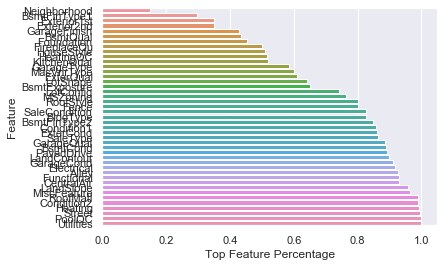

In [149]:
import seaborn as sns

sns.barplot(x='Top Feature Percentage', y ='Feature', data=categorical_percent)
sns.set(rc={'figure.figsize':(12,12)})

In [150]:
drop_cat = list(categorical_percent[categorical_percent['Top Feature Percentage']>.7]['Feature'])

df_copy = df

df_copy= df_copy.drop(drop_cat, axis=1)
df_copy

,MSSubClass,LotFrontage,LotArea,LotShape,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,PoolArea,MiscVal,MoSold,YrSold,TotalFinishedBsmt,TotalBath
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,20,80.0,11622,Reg,NAmes,1Story,5,6,49,49,VinylSd,VinylSd,None,0.0,TA,CBlock,TA,No,Rec,270.0,882.0,TA,896,0,0,896,2,1,TA,5,0,not present,Attchd,49.0,Unf,1.0,730.0,140,0,120,0,0,6,2010,612.0,1.0
1462,20,81.0,14267,IR1,NAmes,1Story,6,6,52,52,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,CBlock,TA,No,ALQ,406.0,1329.0,TA,1329,0,0,1329,3,1,Gd,6,0,not present,Attchd,52.0,Unf,1.0,312.0,393,36,0,0,12500,6,2010,923.0,1.5
1463,60,74.0,13830,IR1,Gilbert,2Story,5,5,13,12,VinylSd,VinylSd,None,0.0,TA,PConc,Gd,No,GLQ,137.0,928.0,Gd,928,701,0,1629,3,1,TA,6,1,TA,Attchd,13.0,Fin,2.0,482.0,212,34,0,0,0,3,2010,791.0,2.5
1464,60,78.0,9978,IR1,Gilbert,2Story,6,6,12,12,VinylSd,VinylSd,BrkFace,20.0,TA,PConc,TA,No,GLQ,324.0,926.0,Ex,926,678,0,1604,3,1,Gd,7,1,Gd,Attchd,12.0,Fin,2.0,470.0,360,36,0,0,0,6,2010,602.0,2.5
1465,120,43.0,5005,IR1,StoneBr,1Story,8,5,18,18,HdBoard,HdBoard,None,0.0,Gd,PConc,Gd,No,ALQ,1017.0,1280.0,Ex,1280,0,0,1280,2,1,Gd,5,0,not present,Attchd,18.0,RFn,2.0,506.0,0,82,144,0,0,1,2010,263.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,21.0,1936,Reg,MeadowV,2Story,4,7,36,36,CemntBd,CmentBd,None,0.0,TA,CBlock,TA,No,Unf,546.0,546.0,Gd,546,546,0,1092,3,1,TA,5,0,not present,not present,27.0,not present,0.0,0.0,0,0,0,0,0,6,2006,0.0,1.5
2916,160,21.0,1894,Reg,MeadowV,2Story,4,5,36,36,CemntBd,CmentBd,None,0.0,TA,CBlock,TA,No,Rec,294.0,546.0,TA,546,546,0,1092,3,1,TA,6,0,not present,CarPort,36.0,Unf,1.0,286.0,0,24,0,0,0,4,2006,252.0,1.5
2917,20,160.0,20000,Reg,Mitchel,1Story,5,7,46,10,VinylSd,VinylSd,None,0.0,TA,CBlock,TA,No,ALQ,0.0,1224.0,Ex,1224,0,0,1224,4,1,TA,7,1,TA,Detchd,46.0,Unf,2.0,576.0,474,0,0,0,0,9,2006,1224.0,2.0


### Checking Dominant Discrete Features

In [151]:
discrete_features = [feature for feature in numerical_features if (len(df[feature].unique()) < 30) and (feature not in year_features+['Id'])]

discrete_features


['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'TotalBath']

In [152]:
for feature in discrete_features:
    print(df[feature].value_counts())

20     543
60     276
50     143
120     95
30      70
70      68
160     65
80      60
90      57
190     31
85      28
180      7
75       7
45       6
40       2
150      1
Name: MSSubClass, dtype: int64
5     428
6     357
7     281
8     174
4     110
9      64
3      20
10     13
2      10
1       2
Name: OverallQual, dtype: int64
5    824
6    279
7    185
8     72
4     44
3     25
9     19
1      6
2      5
Name: OverallCond, dtype: int64
0       1445
1064       1
697        1
512        1
450        1
436        1
431        1
362        1
312        1
259        1
205        1
140        1
114        1
108        1
80         1
Name: LowQualFinSF, dtype: int64
3    792
2    384
4    187
1     53
5     27
6     14
0      2
Name: BedroomAbvGr, dtype: int64
1    1393
2      64
0       2
Name: KitchenAbvGr, dtype: int64
6     442
7     320
5     308
8     160
4      99
9      68
10     33
11     14
3       8
12      5
15      1
13      1
Name: TotRmsAbvGrd, dtype: int64
0    730

In [153]:
ls=[]
for feature in discrete_features:
    x = list(df[feature].value_counts())[0]/len(df)
    ls.append(x)
   
discrete_percent = pd.DataFrame(list(zip(discrete_features,ls)))
discrete_percent.columns= ['Feature', 'Top Feature Percentage']
discrete_percent = discrete_percent.sort_values('Top Feature Percentage')
discrete_percent

,Feature,Top Feature Percentage
11,MoSold,0.171350
1,OverallQual,0.293352
6,TotRmsAbvGrd,0.302947
12,TotalBath,0.305689
0,MSSubClass,0.372173
7,Fireplaces,0.500343
8,GarageCars,0.528444
4,BedroomAbvGr,0.542838
2,OverallCond,0.564770
5,KitchenAbvGr,0.954764


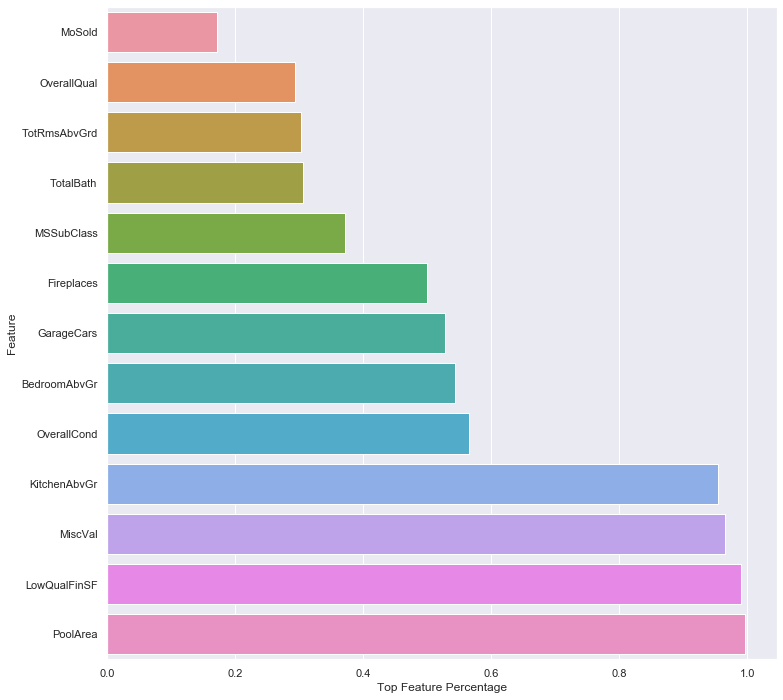

In [154]:
sns.barplot(x='Top Feature Percentage', y ='Feature', data=discrete_percent)
sns.set(rc={'figure.figsize':(6,6)})

In [155]:
#filtering out discrete variables that have one feature accounting for over 70% percent of observations

drop_discrete = list(discrete_percent[discrete_percent['Top Feature Percentage']>.7]['Feature'])

In [156]:
df_copy = df_copy.drop(drop_discrete, axis=1)

In [157]:
df_copy

,MSSubClass,LotFrontage,LotArea,LotShape,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,TotalFinishedBsmt,TotalBath
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,20,80.0,11622,Reg,NAmes,1Story,5,6,49,49,VinylSd,VinylSd,None,0.0,TA,CBlock,TA,No,Rec,270.0,882.0,TA,896,0,896,2,TA,5,0,not present,Attchd,49.0,Unf,1.0,730.0,140,0,120,6,2010,612.0,1.0
1462,20,81.0,14267,IR1,NAmes,1Story,6,6,52,52,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,CBlock,TA,No,ALQ,406.0,1329.0,TA,1329,0,1329,3,Gd,6,0,not present,Attchd,52.0,Unf,1.0,312.0,393,36,0,6,2010,923.0,1.5
1463,60,74.0,13830,IR1,Gilbert,2Story,5,5,13,12,VinylSd,VinylSd,None,0.0,TA,PConc,Gd,No,GLQ,137.0,928.0,Gd,928,701,1629,3,TA,6,1,TA,Attchd,13.0,Fin,2.0,482.0,212,34,0,3,2010,791.0,2.5
1464,60,78.0,9978,IR1,Gilbert,2Story,6,6,12,12,VinylSd,VinylSd,BrkFace,20.0,TA,PConc,TA,No,GLQ,324.0,926.0,Ex,926,678,1604,3,Gd,7,1,Gd,Attchd,12.0,Fin,2.0,470.0,360,36,0,6,2010,602.0,2.5
1465,120,43.0,5005,IR1,StoneBr,1Story,8,5,18,18,HdBoard,HdBoard,None,0.0,Gd,PConc,Gd,No,ALQ,1017.0,1280.0,Ex,1280,0,1280,2,Gd,5,0,not present,Attchd,18.0,RFn,2.0,506.0,0,82,144,1,2010,263.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,21.0,1936,Reg,MeadowV,2Story,4,7,36,36,CemntBd,CmentBd,None,0.0,TA,CBlock,TA,No,Unf,546.0,546.0,Gd,546,546,1092,3,TA,5,0,not present,not present,27.0,not present,0.0,0.0,0,0,0,6,2006,0.0,1.5
2916,160,21.0,1894,Reg,MeadowV,2Story,4,5,36,36,CemntBd,CmentBd,None,0.0,TA,CBlock,TA,No,Rec,294.0,546.0,TA,546,546,1092,3,TA,6,0,not present,CarPort,36.0,Unf,1.0,286.0,0,24,0,4,2006,252.0,1.5
2917,20,160.0,20000,Reg,Mitchel,1Story,5,7,46,10,VinylSd,VinylSd,None,0.0,TA,CBlock,TA,No,ALQ,0.0,1224.0,Ex,1224,0,1224,4,TA,7,1,TA,Detchd,46.0,Unf,2.0,576.0,474,0,0,9,2006,1224.0,2.0


### Removing Variables with Multicolinearity

#### Removing Features that are not correlated to Sale Price

In [158]:
numerical_features_copy = [feature for feature in numerical_features if feature in df_copy.columns]


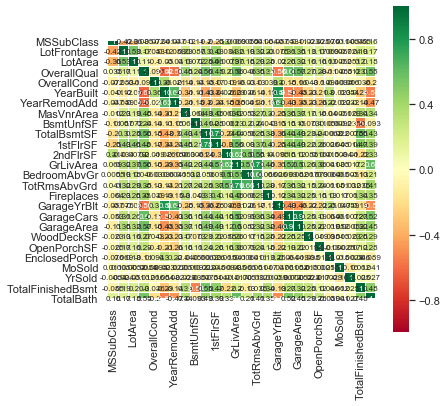

In [159]:
golden_corr = df_copy[numerical_features_copy].corr()

sns.heatmap(golden_corr, cmap = 'RdYlGn', vmax = 1.0, vmin = -1.0, linewidths = .1, annot = True, annot_kws={'size': 8}, square = True)
sns.set(rc={'figure.figsize':(15,15)})

In [160]:
#low_salecorr_drop = list(golden_corr[abs(golden_corr['SalePrice'])<.2]['SalePrice'].index)
low_salecorr_drop=['MSSubClass','OverallCond','BedroomAbvGr','EnclosedPorch','MoSold','YrSold']
df_copy = df_copy.drop(low_salecorr_drop, axis =1)


In [161]:
df_copy

,LotFrontage,LotArea,LotShape,Neighborhood,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,TotalFinishedBsmt,TotalBath
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,80.0,11622,Reg,NAmes,1Story,5,49,49,VinylSd,VinylSd,None,0.0,TA,CBlock,TA,No,Rec,270.0,882.0,TA,896,0,896,TA,5,0,not present,Attchd,49.0,Unf,1.0,730.0,140,0,612.0,1.0
1462,81.0,14267,IR1,NAmes,1Story,6,52,52,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,CBlock,TA,No,ALQ,406.0,1329.0,TA,1329,0,1329,Gd,6,0,not present,Attchd,52.0,Unf,1.0,312.0,393,36,923.0,1.5
1463,74.0,13830,IR1,Gilbert,2Story,5,13,12,VinylSd,VinylSd,None,0.0,TA,PConc,Gd,No,GLQ,137.0,928.0,Gd,928,701,1629,TA,6,1,TA,Attchd,13.0,Fin,2.0,482.0,212,34,791.0,2.5
1464,78.0,9978,IR1,Gilbert,2Story,6,12,12,VinylSd,VinylSd,BrkFace,20.0,TA,PConc,TA,No,GLQ,324.0,926.0,Ex,926,678,1604,Gd,7,1,Gd,Attchd,12.0,Fin,2.0,470.0,360,36,602.0,2.5
1465,43.0,5005,IR1,StoneBr,1Story,8,18,18,HdBoard,HdBoard,None,0.0,Gd,PConc,Gd,No,ALQ,1017.0,1280.0,Ex,1280,0,1280,Gd,5,0,not present,Attchd,18.0,RFn,2.0,506.0,0,82,263.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,21.0,1936,Reg,MeadowV,2Story,4,36,36,CemntBd,CmentBd,None,0.0,TA,CBlock,TA,No,Unf,546.0,546.0,Gd,546,546,1092,TA,5,0,not present,not present,27.0,not present,0.0,0.0,0,0,0.0,1.5
2916,21.0,1894,Reg,MeadowV,2Story,4,36,36,CemntBd,CmentBd,None,0.0,TA,CBlock,TA,No,Rec,294.0,546.0,TA,546,546,1092,TA,6,0,not present,CarPort,36.0,Unf,1.0,286.0,0,24,252.0,1.5
2917,160.0,20000,Reg,Mitchel,1Story,5,46,10,VinylSd,VinylSd,None,0.0,TA,CBlock,TA,No,ALQ,0.0,1224.0,Ex,1224,0,1224,TA,7,1,TA,Detchd,46.0,Unf,2.0,576.0,474,0,1224.0,2.0


In [162]:
low_salecorr_drop

['MSSubClass',
 'OverallCond',
 'BedroomAbvGr',
 'EnclosedPorch',
 'MoSold',
 'YrSold']

#### Removing Features that are highly correlated to one another

In [163]:
numerical_features_copy = [feature for feature in numerical_features if feature in df_copy.columns]

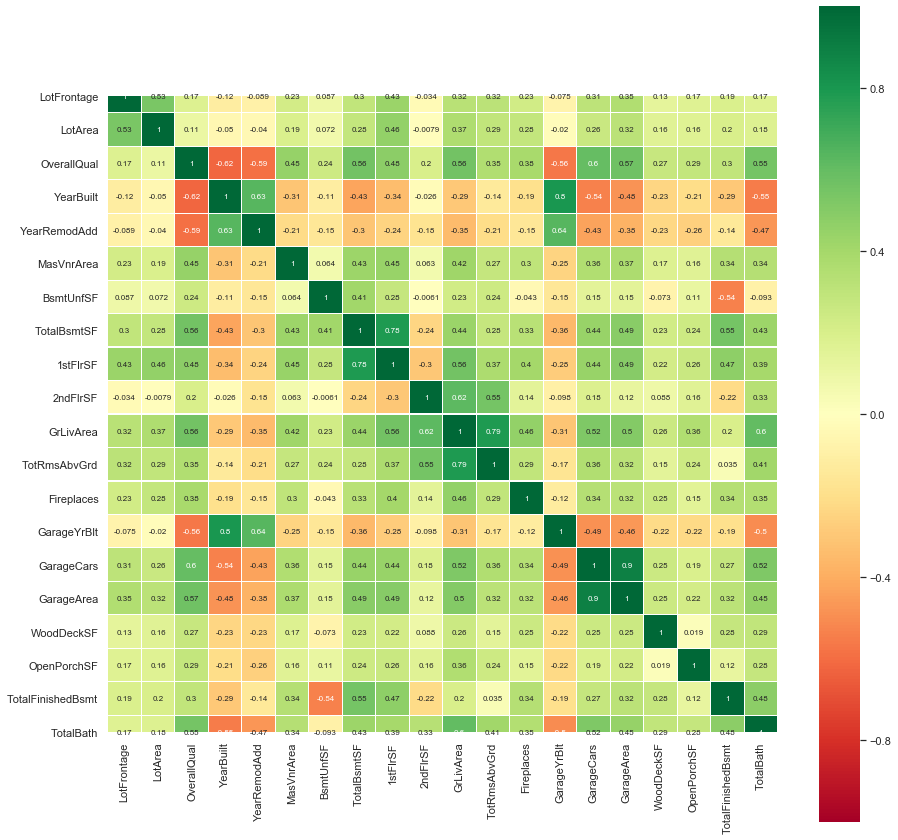

In [164]:
golden_corr = df_copy[numerical_features_copy].corr()

sns.heatmap(golden_corr, cmap = 'RdYlGn', vmax = 1.0, vmin = -1.0, linewidths = .1, annot = True, annot_kws={'size': 8}, square = True)
sns.set(rc={'figure.figsize':(15,15)})

In [165]:
#Calulating VIF to test if there is multicolinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

test = calc_vif(df_copy[numerical_features_copy])
test[test['VIF']<10]
test

In [166]:
t = df_copy.copy()
t['LotArea'].describe()

count     1459.000000
mean      9819.161069
std       4955.517327
min       1470.000000
25%       7391.000000
50%       9399.000000
75%      11517.500000
max      56600.000000
Name: LotArea, dtype: float64

In [167]:
stats.boxcox(t['LotArea'], lmbda=0.08535789215442165)

array([14.33176646, 14.79167167, 14.72137818, ..., 15.56705939,
       14.09460193, 13.91639836])

In [168]:
lmda = [0.5252183097803825,
0.08535789215442165,
-0.2414941744101274,
0.4709822806972006,
0.8183162873432392,
0.02293986760371175,
-0.12811877648382855,
0.08866691316812471,
0.8155754504419407,
-0.07710305486277903,
0.008798063038343512,
0.24603920090562464]



### Box Cox Transformation for Continuous Numercial Features

In [169]:
from scipy import stats
i = [feature for feature in continuous_features if (feature in df_copy.columns)] #and (feature != 'SalePrice')]
test = df_copy.copy()
test[i]

,LotFrontage,LotArea,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,TotalFinishedBsmt
Id,,,,,,,,,,,,
1461,80.0,11622,0.0,270.0,882.0,896,0,896,730.0,140,0,612.0
1462,81.0,14267,108.0,406.0,1329.0,1329,0,1329,312.0,393,36,923.0
1463,74.0,13830,0.0,137.0,928.0,928,701,1629,482.0,212,34,791.0
1464,78.0,9978,20.0,324.0,926.0,926,678,1604,470.0,360,36,602.0
1465,43.0,5005,0.0,1017.0,1280.0,1280,0,1280,506.0,0,82,263.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2915,21.0,1936,0.0,546.0,546.0,546,546,1092,0.0,0,0,0.0
2916,21.0,1894,0.0,294.0,546.0,546,546,1092,286.0,0,24,252.0
2917,160.0,20000,0.0,0.0,1224.0,1224,0,1224,576.0,474,0,1224.0


In [170]:
lmda = [0.5252183097803825,
0.08535789215442165,
-0.2414941744101274,
0.4709822806972006,
0.8183162873432392,
0.02293986760371175,
-0.12811877648382855,
0.08866691316812471,
0.8155754504419407,
-0.07710305486277903,
0.008798063038343512,
0.24603920090562464]
for f in i:
    transformed= (stats.boxcox(test[f]+1, lmbda=lmda[i.index(f)]))
    test[f]=transformed
    #print(transformed)
    
    
#pd.DataFrame(transformed)
df_copy = test

In [171]:
df_copy

,LotFrontage,LotArea,LotShape,Neighborhood,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,TotalFinishedBsmt,TotalBath
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,17.239974,14.331958,Reg,NAmes,1Story,5,49,49,VinylSd,VinylSd,None,0.000000,TA,CBlock,TA,No,Rec,27.585287,313.412543,TA,7.357954,0.000000,9.330669,TA,5,0,not present,Attchd,49.0,Unf,1.0,264.403528,4.114074,0.000000,15.651672,1.0
1462,17.363745,14.791830,IR1,NAmes,1Story,6,52,52,Wd Sdng,Wd Sdng,BrkFace,2.807160,TA,CBlock,TA,No,ALQ,33.857358,438.701803,TA,7.820401,0.000000,10.063127,Gd,6,0,not present,Attchd,52.0,Unf,1.0,131.770476,4.788630,3.668888,17.746189,1.5
1463,16.481581,14.721541,IR1,Gilbert,2Story,5,13,12,VinylSd,VinylSd,None,0.000000,TA,PConc,Gd,No,GLQ,19.496025,326.763298,Gd,7.398940,4.434574,10.451508,TA,6,1,TA,Attchd,13.0,Fin,2.0,188.225022,4.391315,3.611538,16.934467,2.5
1464,16.990235,13.995088,IR1,Gilbert,2Story,6,12,12,VinylSd,VinylSd,BrkFace,2.155774,TA,PConc,TA,No,GLQ,30.239719,326.185368,Ex,7.396419,4.420157,10.421749,Gd,7,1,Gd,Attchd,12.0,Fin,2.0,184.377339,4.733267,3.668888,15.572046,2.5
1465,11.990167,12.524870,IR1,StoneBr,1Story,8,18,18,HdBoard,HdBoard,None,0.000000,Gd,PConc,Gd,No,ALQ,53.287185,425.393715,Ex,7.776148,0.000000,9.992213,Gd,5,0,not present,Attchd,18.0,RFn,2.0,195.868115,0.000000,4.505861,11.960871,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,7.750426,10.637774,Reg,MeadowV,2Story,4,36,36,CemntBd,CmentBd,None,0.000000,TA,CBlock,TA,No,Unf,39.232818,211.404987,Gd,6.783129,4.325094,9.694977,TA,5,0,not present,not present,27.0,not present,0.0,0.000000,0.000000,0.000000,0.000000,1.5
2916,7.750426,10.595986,Reg,MeadowV,2Story,4,36,36,CemntBd,CmentBd,None,0.000000,TA,CBlock,TA,No,Rec,28.796661,211.404987,TA,6.783129,4.325094,9.694977,TA,6,0,not present,CarPort,36.0,Unf,1.0,122.688903,0.000000,3.264888,11.793940,1.5
2917,25.557608,15.567176,Reg,Mitchel,1Story,5,46,10,VinylSd,VinylSd,None,0.000000,TA,CBlock,TA,No,ALQ,0.000000,410.070548,Ex,7.723501,0.000000,9.908077,TA,7,1,TA,Detchd,46.0,Unf,2.0,217.793513,4.905717,0.000000,19.313116,2.0


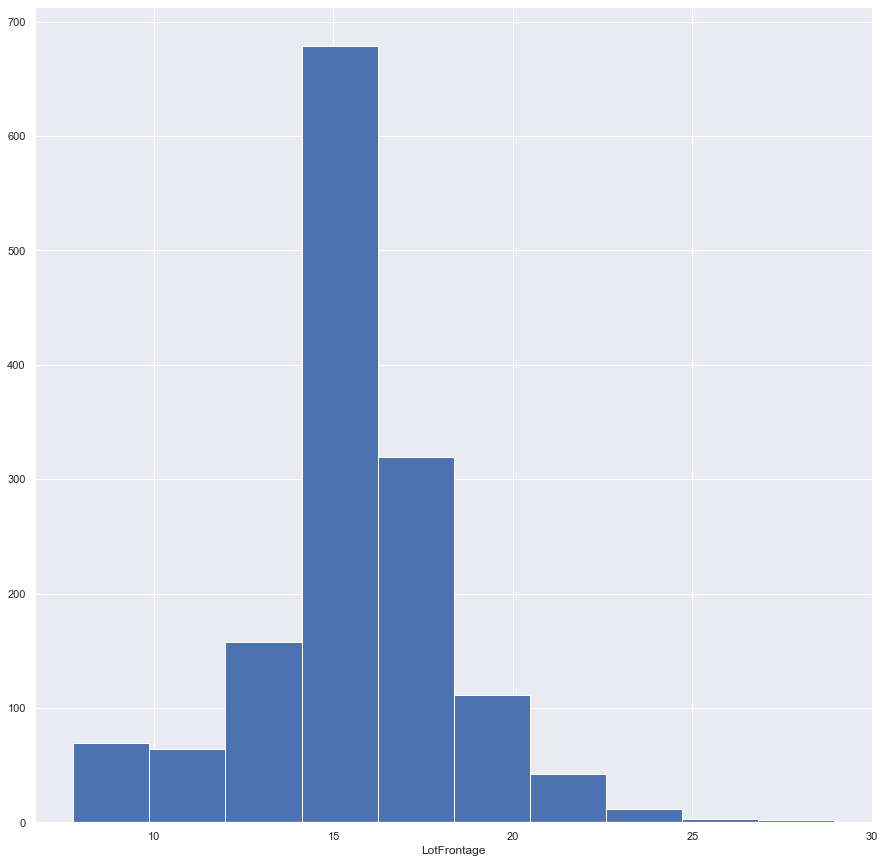

<Figure size 360x360 with 0 Axes>

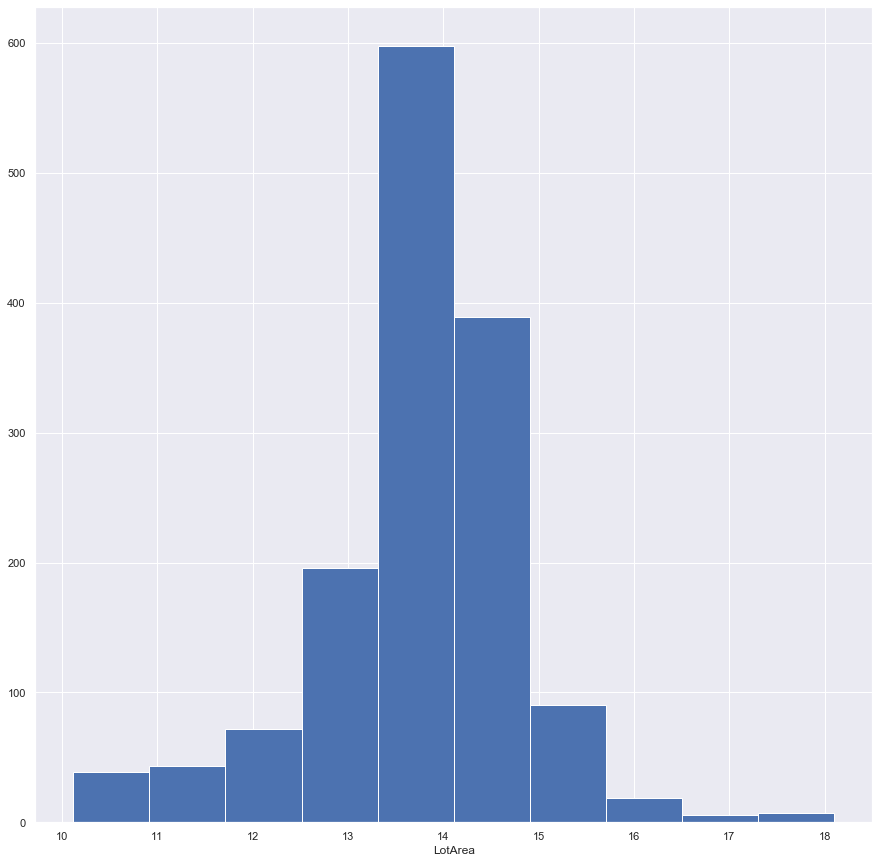

<Figure size 360x360 with 0 Axes>

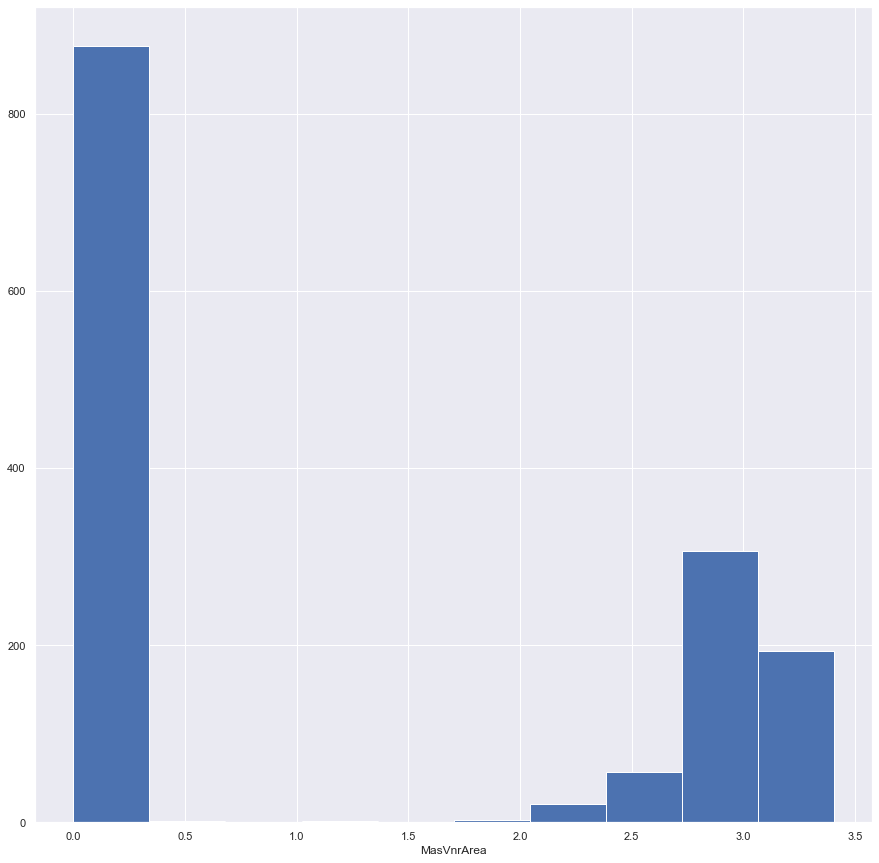

<Figure size 360x360 with 0 Axes>

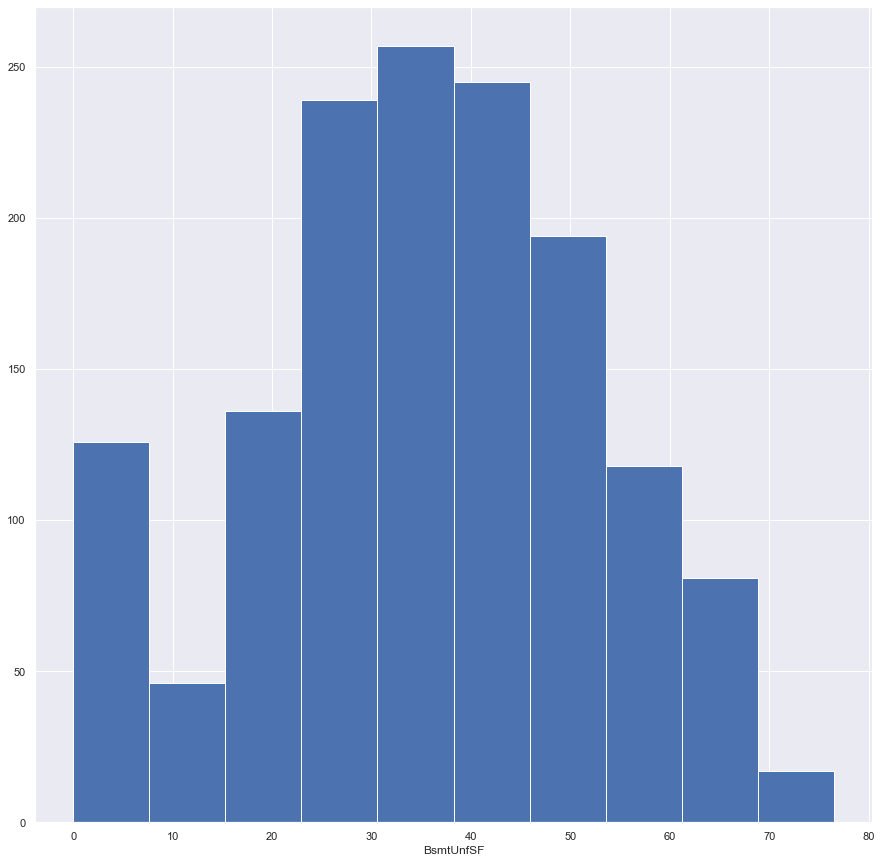

<Figure size 360x360 with 0 Axes>

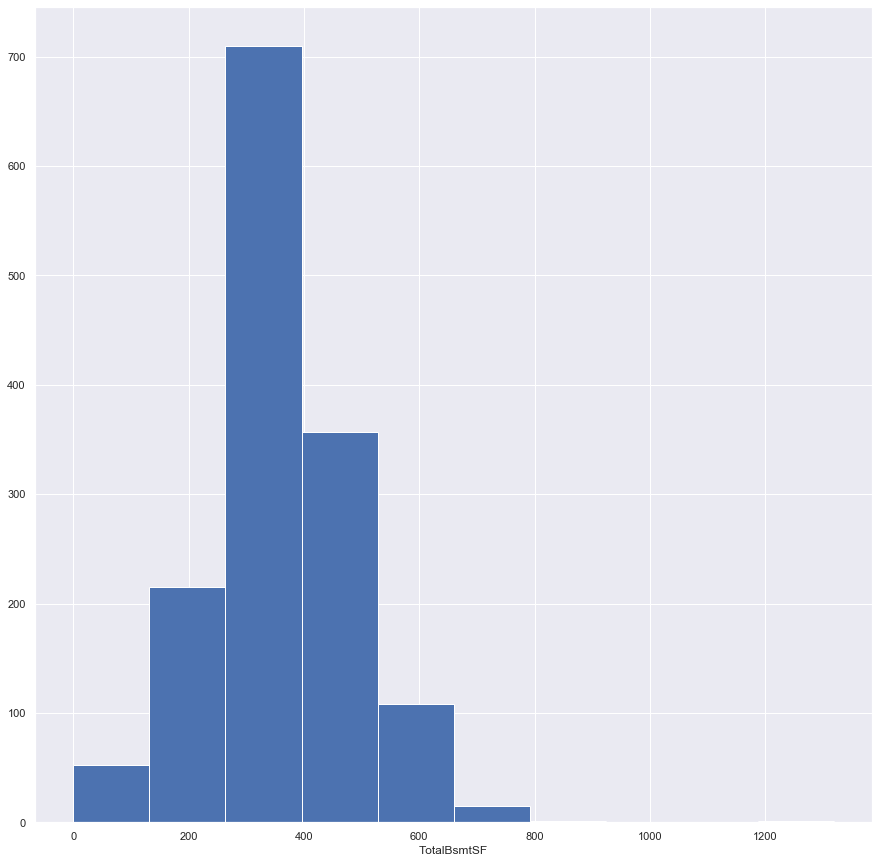

<Figure size 360x360 with 0 Axes>

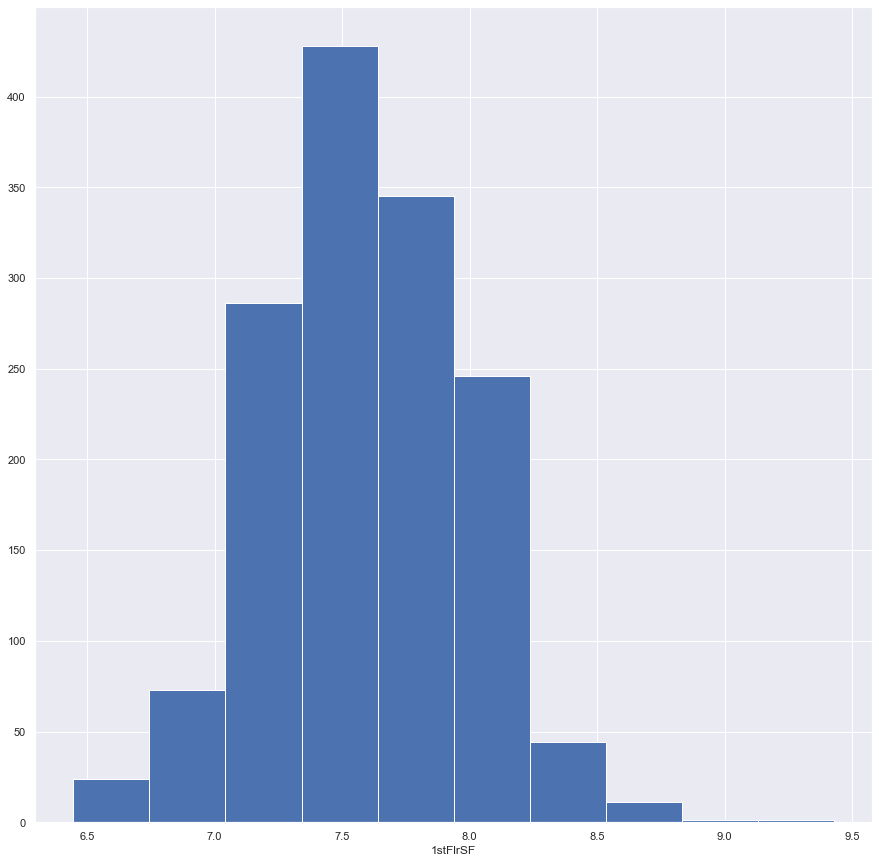

<Figure size 360x360 with 0 Axes>

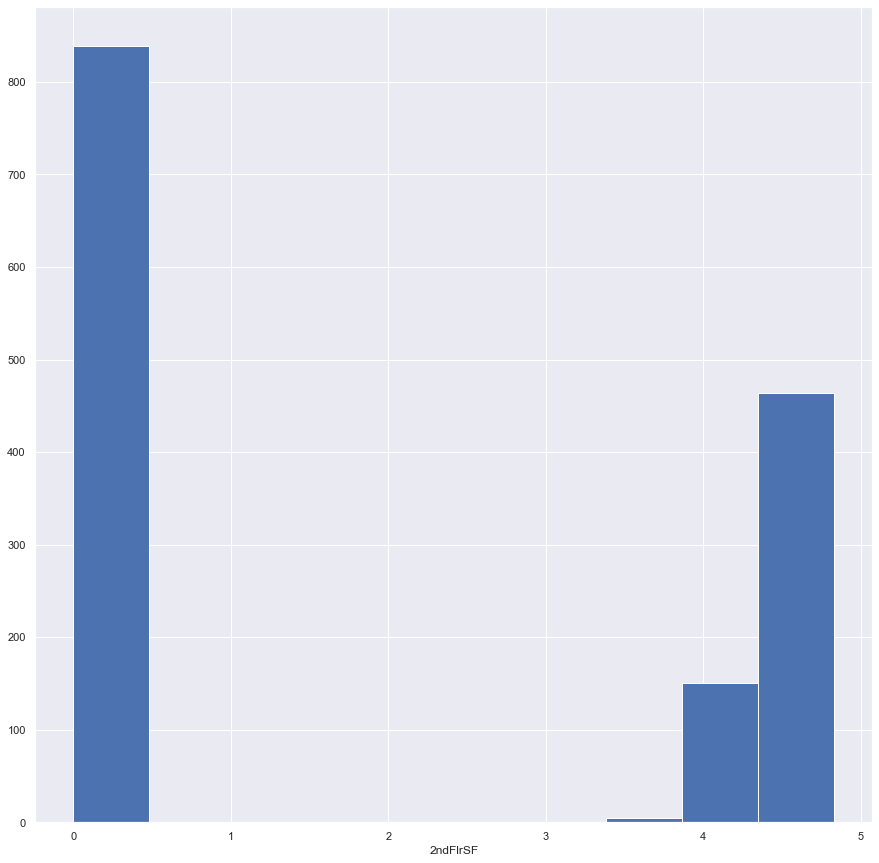

<Figure size 360x360 with 0 Axes>

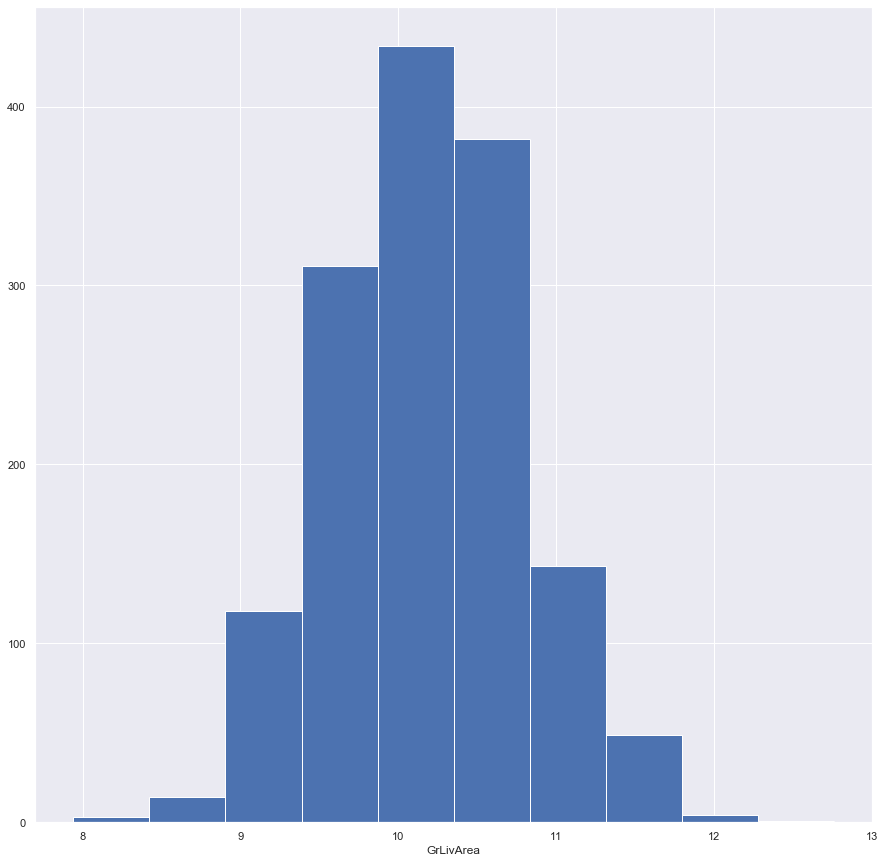

<Figure size 360x360 with 0 Axes>

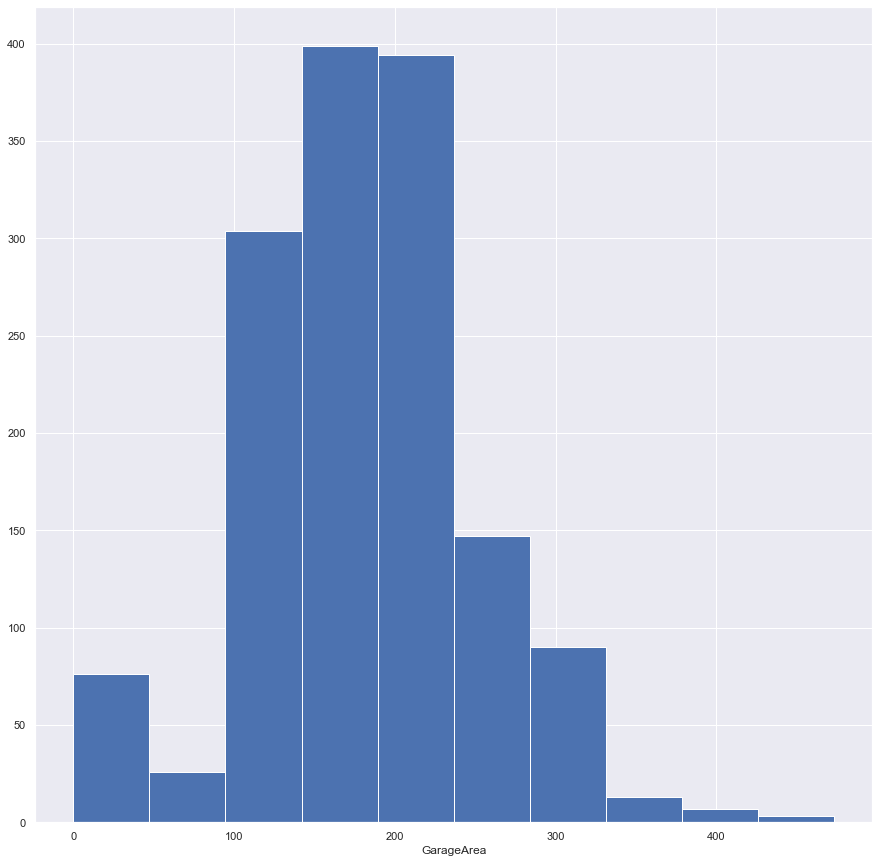

<Figure size 360x360 with 0 Axes>

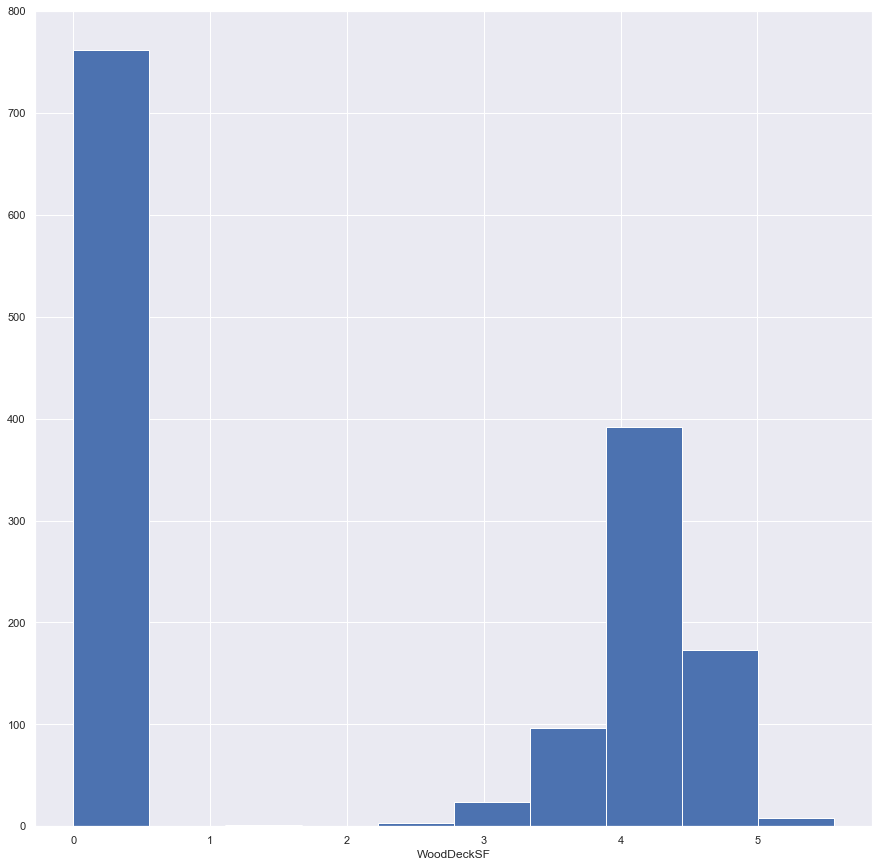

<Figure size 360x360 with 0 Axes>

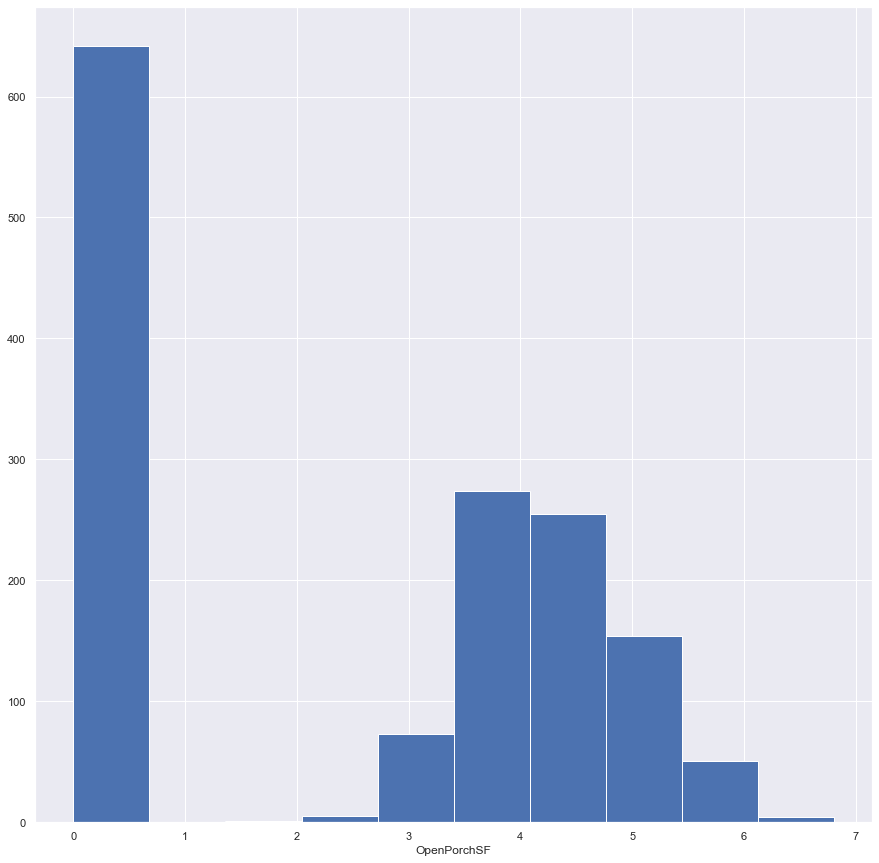

<Figure size 360x360 with 0 Axes>

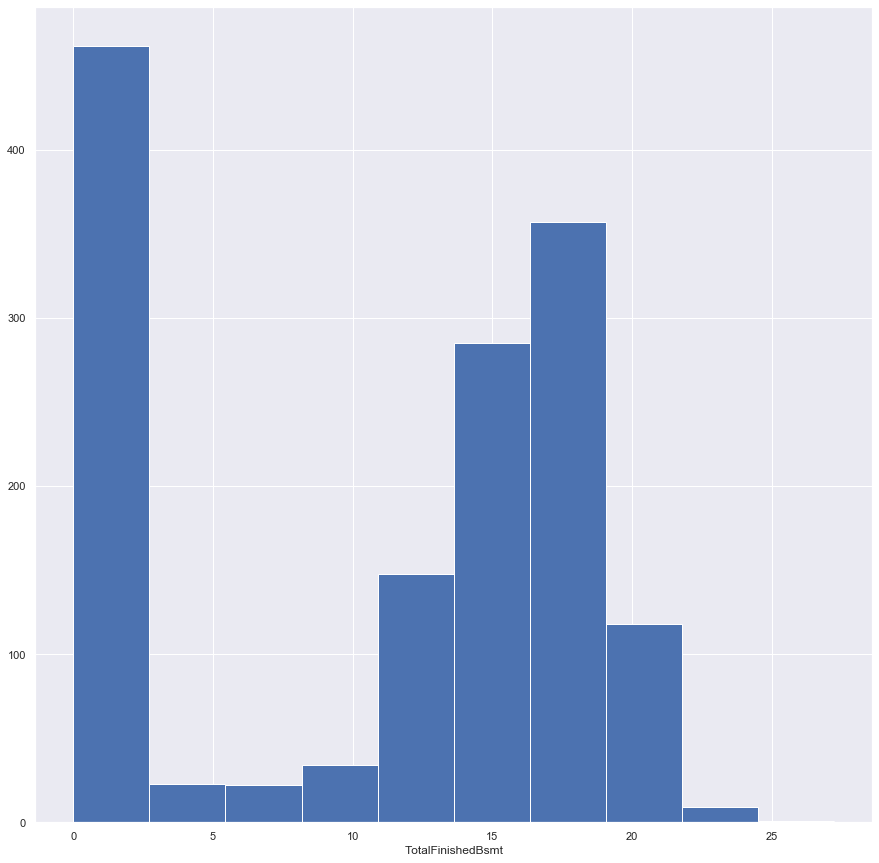

<Figure size 360x360 with 0 Axes>

In [172]:
for feature in i:
    data=test.copy()
    plt.hist(data[feature])
    plt.xlabel(feature)
    plt.figure(figsize=[5,5])
    plt.show()

In [173]:
df_copy

,LotFrontage,LotArea,LotShape,Neighborhood,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,TotalFinishedBsmt,TotalBath
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,17.239974,14.331958,Reg,NAmes,1Story,5,49,49,VinylSd,VinylSd,None,0.000000,TA,CBlock,TA,No,Rec,27.585287,313.412543,TA,7.357954,0.000000,9.330669,TA,5,0,not present,Attchd,49.0,Unf,1.0,264.403528,4.114074,0.000000,15.651672,1.0
1462,17.363745,14.791830,IR1,NAmes,1Story,6,52,52,Wd Sdng,Wd Sdng,BrkFace,2.807160,TA,CBlock,TA,No,ALQ,33.857358,438.701803,TA,7.820401,0.000000,10.063127,Gd,6,0,not present,Attchd,52.0,Unf,1.0,131.770476,4.788630,3.668888,17.746189,1.5
1463,16.481581,14.721541,IR1,Gilbert,2Story,5,13,12,VinylSd,VinylSd,None,0.000000,TA,PConc,Gd,No,GLQ,19.496025,326.763298,Gd,7.398940,4.434574,10.451508,TA,6,1,TA,Attchd,13.0,Fin,2.0,188.225022,4.391315,3.611538,16.934467,2.5
1464,16.990235,13.995088,IR1,Gilbert,2Story,6,12,12,VinylSd,VinylSd,BrkFace,2.155774,TA,PConc,TA,No,GLQ,30.239719,326.185368,Ex,7.396419,4.420157,10.421749,Gd,7,1,Gd,Attchd,12.0,Fin,2.0,184.377339,4.733267,3.668888,15.572046,2.5
1465,11.990167,12.524870,IR1,StoneBr,1Story,8,18,18,HdBoard,HdBoard,None,0.000000,Gd,PConc,Gd,No,ALQ,53.287185,425.393715,Ex,7.776148,0.000000,9.992213,Gd,5,0,not present,Attchd,18.0,RFn,2.0,195.868115,0.000000,4.505861,11.960871,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,7.750426,10.637774,Reg,MeadowV,2Story,4,36,36,CemntBd,CmentBd,None,0.000000,TA,CBlock,TA,No,Unf,39.232818,211.404987,Gd,6.783129,4.325094,9.694977,TA,5,0,not present,not present,27.0,not present,0.0,0.000000,0.000000,0.000000,0.000000,1.5
2916,7.750426,10.595986,Reg,MeadowV,2Story,4,36,36,CemntBd,CmentBd,None,0.000000,TA,CBlock,TA,No,Rec,28.796661,211.404987,TA,6.783129,4.325094,9.694977,TA,6,0,not present,CarPort,36.0,Unf,1.0,122.688903,0.000000,3.264888,11.793940,1.5
2917,25.557608,15.567176,Reg,Mitchel,1Story,5,46,10,VinylSd,VinylSd,None,0.000000,TA,CBlock,TA,No,ALQ,0.000000,410.070548,Ex,7.723501,0.000000,9.908077,TA,7,1,TA,Detchd,46.0,Unf,2.0,217.793513,4.905717,0.000000,19.313116,2.0


In [174]:
x = [df_copy[feature].mean() for feature in i]
list(zip(i, x))

[('LotFrontage', 15.538332691600099),
 ('LotArea', 13.73574186018837),
 ('MasVnrArea', 1.173705760436357),
 ('BsmtUnfSF', 35.32818977024572),
 ('TotalBsmtSF', 354.9514938491959),
 ('1stFlrSF', 7.594706678803192),
 ('2ndFlrSF', 1.886841402130191),
 ('GrLivArea', 10.188338339830308),
 ('GarageArea', 181.51939899874813),
 ('WoodDeckSF', 2.013585860651545),
 ('OpenPorchSF', 2.4029731753930954),
 ('TotalFinishedBsmt', 10.712724385586073)]

### Dummifying Categorical Variables

In [175]:
categorical_features = [feature for feature in data.columns if data[feature].dtypes == 'O']

In [103]:
temp = pd.get_dummies(df_copy, drop_first=True)

In [104]:
#dummified version of the dataframe
temp

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,TotalFinishedBsmt,TotalBath,LotShape_IR2,LotShape_IR3,LotShape_Reg,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior1st_not present,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Exterior2nd_not present,MasVnrType_BrkFace,MasVnrType_Missing,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtQual_not present,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_not present,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType1_not present,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,KitchenQual_not present,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_not present,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_not present,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_not present
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,17.239974,14.331958,5,49,49,0.000000,27.585287,313.412543,7.357954,0.000000,9.330669,5,0,49.0,1.0,264.403528,4.114074,0.000000,15.651672,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0
1462,17.363745,14.791830,6,52,52,2.807160,33.857358,438.701803,7.820401,0.000000,10.063127,6,0,52.0,1.0,131.770476,4.788630,3.668888,17.746189,1.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0
1463,16.481581,14.721541,5,13,12,0.000000,19.496025,326.763298,7.398940,4.434574,10.451508,6,1,13.0,2.0,188.225022,4.391315,3.611538,16.934467,2.5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
1464,16.990235,13.995088,6,12,12,2.155774,30.239719,326.185368,7.396419,4.420157,10.421749,7,1,12.0,2.0,184.377339,4.733267,3.668888,15.572046,2.5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
1465,11.990167,12.524870,8,18,18,0.000000,53.287185,425.393715,7.776148,0.000000,9.992213,5,0,18.0,2.0,195.868115,0.000000,4.505861,11.960871,2.0,0,0,0,0,0,0,0,0,0,0,0

### Dropping Irrelavent Neighborhoods

In [105]:
#hoods = list(df_copy.groupby('Neighborhood')['SalePrice'].median().sort_values().index)
#top_hoods = list(df_copy.groupby('Neighborhood')['SalePrice'].median().sort_values()[-3:].index)
#bottom_hoods = list(df_copy.groupby('Neighborhood')['SalePrice'].median().sort_values()[:3].index)

#keep_hoods = top_hoods + bottom_hoods
#drop_hoods = ['Neighborhood_'+h for h in hoods if h not in keep_hoods]

drop_hoods=['Neighborhood_OldTown',
 'Neighborhood_Edwards',
 'Neighborhood_BrkSide',
 'Neighborhood_Sawyer',
 'Neighborhood_Blueste',
 'Neighborhood_SWISU',
 'Neighborhood_NAmes',
 'Neighborhood_NPkVill',
 'Neighborhood_Mitchel',
 'Neighborhood_SawyerW',
 'Neighborhood_Gilbert',
 'Neighborhood_NWAmes',
 'Neighborhood_Blmngtn',
 'Neighborhood_CollgCr',
 'Neighborhood_ClearCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Veenker',
 'Neighborhood_Somerst',
 'Neighborhood_Timber']
feat =[feature for feature in temp.columns if feature not in drop_hoods]
temp = temp[feat]
temp

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,TotalFinishedBsmt,TotalBath,LotShape_IR2,LotShape_IR3,LotShape_Reg,Neighborhood_BrDale,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_StoneBr,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior1st_not present,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Exterior2nd_not present,MasVnrType_BrkFace,MasVnrType_Missing,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtQual_not present,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_not present,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType1_not present,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,KitchenQual_not present,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_not present,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_not present,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_not present
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,17.239974,14.331958,5,49,49,0.000000,27.585287,313.412543,7.357954,0.000000,9.330669,5,0,49.0,1.0,264.403528,4.114074,0.000000,15.651672,1.0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0
1462,17.363745,14.791830,6,52,52,2.807160,33.857358,438.701803,7.820401,0.000000,10.063127,6,0,52.0,1.0,131.770476,4.788630,3.668888,17.746189,1.5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0
1463,16.481581,14.721541,5,13,12,0.000000,19.496025,326.763298,7.398940,4.434574,10.451508,6,1,13.0,2.0,188.225022,4.391315,3.611538,16.934467,2.5,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
1464,16.990235,13.995088,6,12,12,2.155774,30.239719,326.185368,7.396419,4.420157,10.421749,7,1,12.0,2.0,184.377339,4.733267,3.668888,15.572046,2.5,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
1465,11.990167,12.524870,8,18,18,0.000000,53.287185,425.393715,7.776148,0.000000,9.992213,5,0,18.0,2.0,195.868115,0.000000,4.505861,11.960871,2.0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [106]:
sum(temp.isna().sum())

0

In [107]:
temp.to_csv('to_test.csv')

### Lasso Model

In [ ]:
X = temp.drop('SalePrice', axis=1)
y= temp['SalePrice']


In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y)

In [ ]:
#do grid search to deterimine alpha

from sklearn.linear_model import Lasso
alpha_norm = 10

lasso = Lasso(normalize = True, alpha = alpha_norm)
lasso.fit(Xtrain, ytrain)


In [ ]:
lasso.score(Xtest, ytest)



In [ ]:
print(lasso.coef_)
print(lasso.intercept_)

In [ ]:
for i in range(len(lasso.coef_)):
    if lasso.coef_[i] == 0:
        print(i)

In [ ]:
temp.iloc[:,112]